# Will the customer accept the coupon?

## Overview

In this first practical application assignment of the program, you will seek to answer the question, “Will a customer accept the coupon?” The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not. Use the [Coupon Jupyter Notebook](./Coupon.ipynb) to complete this assignment.

### Dataset

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk.
+ The survey describes different driving scenarios, including the destination, current time, weather, passenger, etc., and then asks people whether they will accept the coupon if they are the driver.
+ Answers given that the users will drive there “right away” or “later before the coupon expires” are labeled as “Y = 1”, and answers “no, I do not want the coupon” are labeled as “Y = 0”.
+ There are five different types of coupons—less expensive restaurants (under $20), coffee houses, carry out and take away, bars, and more expensive restaurants ($20–$50).  

A local copy [in-vehicle-coupon-recommendation.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv) of the csv data was downloaded from UCI Machine Learning repository.

### Prerequisites

Python modules can be installed using

```python
python -m pip install requirements.txt
```

In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

In [14]:
# Create image directory if it does not exist
os.makedirs('images', exist_ok=True)

### Import the data into Pandas

In [15]:
#data = "https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv"
data = "in-vehicle-coupon-recommendation.csv"
df = pd.read_csv(data)

### Data overview

### Quality and Understanding Checklist 

+ [X] How many rows and columns? Ans: 10 x 26
+ [X] Which data types are there? Ans: 18 objects and 8 Int64 (some are really bools)
+ [X] How many categorical and numerical columns? 
+ [ ] How many dummy columns (boolean values ; yes/no) 
+ [ ] Are the date column(s) read in the right format?
+ [ ] Are the categorical / numerical column read in the right format?
+ [ ] Are there any duplicates in the data?
+ [X] How many missing values are there? Do any variables have mostly or all missing values? - Ans: only 108 rows with specified cars
+ [ ] Are you going to impute the missing value or drop them?
+ [ ] How would you impute the missing values in numerical vs categorical variables?
+ [ ] Are there strange minimum or maximum values (outliers)? 
+ [ ] Are there strange mean values or large differences between mean and median?
+ [ ] Is there a large skew or excess kurtosis? (This matters for algorithms that assume normal distributions in the data.) 
+ [ ] Are there gaps in the distributions, such as bi-modal or multi-modal distributions? 
+ [ ] Are there any values in the categorical variables that don’t match the dictionary of valid values? 
+ [ ] Are there any high-cardinality categorical variables? [That is categorical values with too many categories]
+ [ ] Are there any categorical variables with large percentages of records having a single value?
+ [ ] Are there any unusually strong relationships with the target variable, possibly indicating leakage of the target into a candidate input variable? 
+ [ ] Are any variables highly correlated with each other, possibly indicating redundant variables? 
+ [ ] Multicollinearity is a problem for linear models like linear regression
+ [ ] Are there any crosstabs that show strong relationships between categorical variables, possibly indicating redundant variables?

In [16]:
# Number of rows and columns
df.info()
df.dtypes.keys()
df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

object    18
int64      8
Name: count, dtype: int64

## 1. Preferred Coupon Categories

Plot histogram of Coupon categories and highlight Customer's decision (Used vs Ignored)

In [17]:
# Map legend - reference: https://stackoverflow.com/questions/63976658/how-to-customize-seaborn-scatterplot-legends
legend_map = {1:'Yes',0: 'No'}

my_plot = sns.histplot(data = df, x='coupon')
# Rotate axis - https://www.statology.org/seaborn-rotate-axis-labels/
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
my_plot = sns.countplot(data=df, x='coupon', hue = df['Y'].map(legend_map))
my_plot.set(title='User Preferences')
plt.legend(title='Coupon Used')
# Avoid cropping saved picture, as described in https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image
plt.tight_layout()
my_plot.figure.savefig('images/user_preferences.jpg')
# Make sure that we overwrite images on each run, as described in https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files
plt.close()



/var/folders/mf/41zwz2m91xsbd2yq5yx308r40000gn/T/ipykernel_48765/3384725981.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


### 2. User categories

Evaluate the categories of users that use the coupon versus not
+ Check impact of education

In [18]:
# Create a new column named proportion, which provides the normalized population
normalized_df = df.groupby(['Y', 'coupon']).aggregate('education').value_counts(normalize=True, ascending = False).reset_index()
normalized_df.info()
normalized_df.head()

# legend_map = {1:'Yes',0: 'No'}
my_plot = sns.boxplot(normalized_df, x='education', y='proportion', hue = normalized_df['Y'].map(legend_map))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
my_plot.set(title='Proportion by user education')
plt.legend(title='Coupon Used')
# Avoid cropping saved picture, as described in https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image
plt.tight_layout()
my_plot.figure.savefig('images/user_education.jpg')
#Make sure that we overwrite images on each run, as described in https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files
plt.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Y           60 non-null     int64  
 1   coupon      60 non-null     object 
 2   education   60 non-null     object 
 3   proportion  60 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


- Check impact of gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Y           20 non-null     int64  
 1   coupon      20 non-null     object 
 2   gender      20 non-null     object 
 3   proportion  20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes


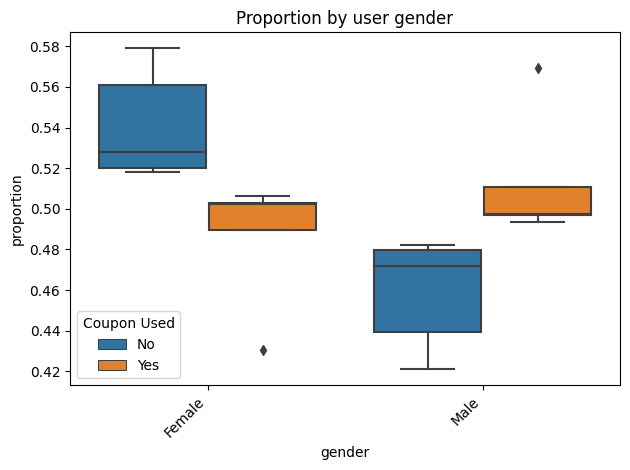

In [22]:
category = 'gender'
# Create a new column named proportion, which provides the normalized population
normalized_df = df.groupby(['Y', 'coupon']).aggregate(category).value_counts(normalize=True, ascending = False).reset_index()
normalized_df.info()
normalized_df.head()

# legend_map = {1:'Yes',0: 'No'}
my_plot = sns.boxplot(normalized_df, x=category, y='proportion', hue = normalized_df['Y'].map(legend_map))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
my_plot.set(title='Proportion by user %s' % category)
plt.legend(title='Coupon Used')
# Avoid cropping saved picture, as described in https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image
plt.tight_layout()
my_plot.figure.savefig('images/user_%s.jpg' % category)
#Make sure that we overwrite images on each run, as described in https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files
# plt.close()

### 3. Correlation Plot

In [21]:
my_plot = sns.pairplot(df, kind = "reg")
# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
my_plot.set(title='Correlations')
# Avoid cropping saved picture, as described in https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image
plt.tight_layout()
my_plot.figure.savefig('images/correlations.jpg')
# Make sure that we overwrite images on each run, as described in https://stackoverflow.com/questions/49039581/matplotlib-savefig-will-not-overwrite-old-files
plt.close()

In [20]:
my_plot = sns.pairplot